In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
path = 'D:\Tb104'
sr = 40000
poststim_window = 0.1 * sr

In [353]:
spikes = np.loadtxt(path+'/Spiketimes/1_FMnotch_chn32_times.txt', delimiter=',')
spikes = spikes[:,0]
spikes *= sr

In [354]:
ts = np.asarray(loadmat(path+'/Matfile/1_FMnotch/event.mat').get('ts'))
ts *= sr

In [355]:
marker = np.asarray(loadmat(path+'/Data/Tb104_1_marker_fm.mat').get('marker_fm'))

In [356]:
notch_freq = np.unique(marker)
trial_num = len(marker)/len(notch_freq)

In [357]:
raster_mat = np.zeros((len(marker), int(poststim_window)))

In [358]:
for stim in range(0, len(ts)):
    stim_loc = (spikes[np.where((spikes > ts[stim]) & (spikes < ts[stim]+poststim_window))] - ts[stim]).astype(int)
    if np.mean(stim_loc) > 0:
        raster_mat[stim,stim_loc] = 1

In [359]:
raster_mat = np.append(raster_mat, marker, axis=1)

In [360]:
raster_mat.shape

(200, 4001)

In [361]:
raster_mat = raster_mat[raster_mat[:,-1].argsort()]

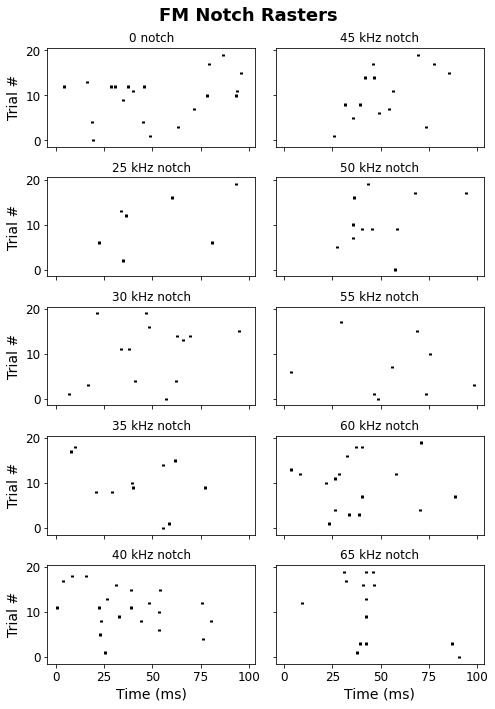

In [362]:
fig1, axs = plt.subplots(5,2, figsize=(7,10), sharey=True, sharex=True)
params = {'xtick.labelsize': 12, 'ytick.labelsize': 12, 'axes.labelsize': 14, 'figure.titlesize': 18,
         'figure.titleweight': 'bold', 'lines.linewidth': 3}
plt.rcParams.update(params)
for n in np.arange(0,20):
    axs[0,0].eventplot(np.asarray(np.where(raster_mat[n, :-2] == 1))/sr * 1000, lineoffsets=0+n, linelengths=0.5, colors='black')
    axs[1,0].eventplot(np.asarray(np.where(raster_mat[n+20,:-2] == 1))/sr * 1000, lineoffsets=0+n, linelengths=0.5, colors='black')
    axs[2,0].eventplot(np.asarray(np.where(raster_mat[n+40,:-2] == 1))/sr * 1000, lineoffsets=0+n, linelengths=0.5, colors='black')
    axs[3,0].eventplot(np.asarray(np.where(raster_mat[n+60,:-2] == 1))/sr * 1000, lineoffsets=0+n, linelengths=0.5, colors='black')
    axs[4,0].eventplot(np.asarray(np.where(raster_mat[n+80,:-2] == 1))/sr * 1000, lineoffsets=0+n, linelengths=0.5, colors='black')
    axs[0,1].eventplot(np.asarray(np.where(raster_mat[n+100,:-2] == 1))/sr * 1000, lineoffsets=0+n, linelengths=0.5, colors='black')
    axs[1,1].eventplot(np.asarray(np.where(raster_mat[n+120,:-2] == 1))/sr * 1000, lineoffsets=0+n, linelengths=0.5, colors='black')
    axs[2,1].eventplot(np.asarray(np.where(raster_mat[n+140,:-2] == 1))/sr * 1000, lineoffsets=0+n, linelengths=0.5, colors='black')
    axs[3,1].eventplot(np.asarray(np.where(raster_mat[n+160,:-2] == 1))/sr * 1000, lineoffsets=0+n, linelengths=0.5, colors='black')
    axs[4,1].eventplot(np.asarray(np.where(raster_mat[n+180,:-2] == 1))/sr * 1000, lineoffsets=0+n, linelengths=0.5, colors='black')
axs[0,0].set_title('{0} notch'.format(notch_freq[0]));
axs[1,0].set_title('{0} kHz notch'.format(notch_freq[1]));
axs[2,0].set_title('{0} kHz notch'.format(notch_freq[2]));
axs[3,0].set_title('{0} kHz notch'.format(notch_freq[3]));
axs[4,0].set_title('{0} kHz notch'.format(notch_freq[4]));
axs[0,1].set_title('{0} kHz notch'.format(notch_freq[5]));
axs[1,1].set_title('{0} kHz notch'.format(notch_freq[6]));
axs[2,1].set_title('{0} kHz notch'.format(notch_freq[7]));
axs[3,1].set_title('{0} kHz notch'.format(notch_freq[8]));
axs[4,1].set_title('{0} kHz notch'.format(notch_freq[9]));

for ax in axs.flat:
    ax.set(xlabel='Time (ms)', ylabel='Trial #')
for ax in axs.flat:
    ax.label_outer()
    
fig1.suptitle('FM Notch Rasters')
plt.tight_layout()
plt.savefig('D:/Notch Analysis/Tb104_1_FMnotch_chn32.jpg', dpi=300)

## 